## Ejercicio 1

In [4]:
import numpy as np
from scipy.optimize import minimize

# Datos observados
data = np.array([2, 2, 0, 1, 0, 2, 2, 3, 3, 3])

# Frecuencias observadas
freq = {0: np.sum(data == 0),  # 2 veces
        1: np.sum(data == 1),  # 1 vez
        2: np.sum(data == 2),  # 4 veces
        3: np.sum(data == 3)}  # 3 veces

# Definir las probabilidades en función de theta
def probabilities(theta):
    return {
        0: theta,                  # (3θ)/3 = θ
        1: 2 * theta,             # (6θ)/3 = 2θ
        2: (1 - 3 * theta) / 3,  # (1 - 3θ)/3
        3: (2 * (1 - 3 * theta)) / 3  # (2(1 - 3θ))/3
    }

# Función de log-verosimilitud negativa (la minimizamos)
def neg_log_likelihood(theta):
    if theta < 0 or theta > 1/3:  # Restricción: 0 ≤ θ ≤ 1/3 para probabilidades válidas
        return np.inf
    probs = probabilities(theta)
    log_lik = 0
    for x in freq:
        if probs[x] <= 0 or probs[x] > 1:  # Verificar que las probabilidades sean válidas
            return np.inf
        log_lik += freq[x] * np.log(probs[x])
    return -log_lik  # Negativa porque scipy minimiza

# Verificación de la suma de probabilidades (debe ser 1)
def check_prob_sum(theta):
    probs = probabilities(theta)
    return np.sum([probs[x] for x in [0, 1, 2, 3]])

# Valor inicial para theta (dentro del dominio válido)
theta_initial = 0.1

# Optimización
result = minimize(neg_log_likelihood, theta_initial, bounds=[(0, 1/3)], method='L-BFGS-B')

# Resultados
theta_mle = result.x[0]
print(f"Valor estimado de θ por máxima verosimilitud: {theta_mle:.4f}")

# Verificar las probabilidades con el θ estimado
probs_mle = probabilities(theta_mle)
print("\nProbabilidades con θ estimado:")
for x, p in probs_mle.items():
    print(f"P(X = {x}) = {p:.4f}")

# Verificar que sumen 1
prob_sum = check_prob_sum(theta_mle)
print(f"Suma de probabilidades: {prob_sum:.4f}")

# Comparar con la solución analítica (opcional)
theta_analytic = 0.1  # Sabemos que θ = 0.1 analíticamente
print(f"\nSolución analítica conocida: θ = {theta_analytic}")
print(f"Diferencia absoluta entre numérica y analítica: {abs(theta_mle - theta_analytic):.6f}")

Valor estimado de θ por máxima verosimilitud: 0.1000

Probabilidades con θ estimado:
P(X = 0) = 0.1000
P(X = 1) = 0.2000
P(X = 2) = 0.2333
P(X = 3) = 0.4667
Suma de probabilidades: 1.0000

Solución analítica conocida: θ = 0.1
Diferencia absoluta entre numérica y analítica: 0.000000


## Ejercicio 2:

Características polinómicas (X, X^2):
[[  0.   0.]
 [  6.  36.]
 [ 11. 121.]
 [ 16. 256.]
 [ 23. 529.]]

Modelo: Y = 16.9262 + -5.0549X + 1.1884X^2


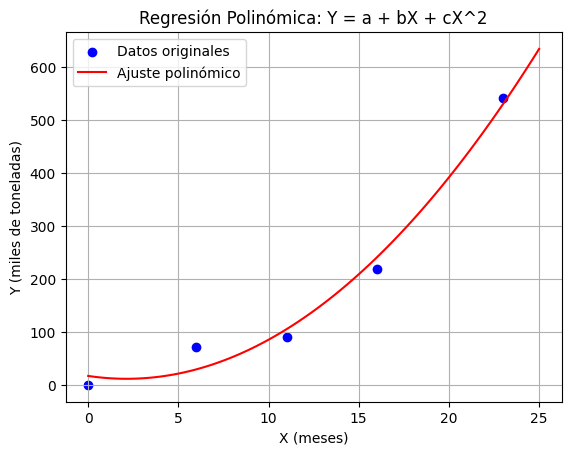

Coeficiente de determinación R^2: 0.9848


In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Paso 1: Definir los datos
X = np.array([0, 6, 11, 16, 23]).reshape(-1, 1)  # Reshape para que sea una matriz 2D
Y = np.array([0, 71, 91, 219, 540])

# Paso 2: Crear características polinómicas (grado 2: X y X^2)
poly = PolynomialFeatures(degree=2, include_bias=False)  # include_bias=False porque el intercepto lo maneja LinearRegression
X_poly = poly.fit_transform(X)

# Ver las características generadas (opcional)
print("Características polinómicas (X, X^2):")
print(X_poly)

# Paso 3: Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_poly, Y)

# Paso 4: Obtener los coeficientes
a = model.intercept_  # Intercepto (a)
b, c = model.coef_    # Coeficientes de X y X^2 (b y c)

# Imprimir los resultados
print(f"\nModelo: Y = {a:.4f} + {b:.4f}X + {c:.4f}X^2")

# Paso 5 (opcional): Visualizar el ajuste
X_range = np.linspace(0, 25, 100).reshape(-1, 1)  # Rango para la curva
X_range_poly = poly.transform(X_range)
Y_pred = model.predict(X_range_poly)

plt.scatter(X, Y, color='blue', label='Datos originales')
plt.plot(X_range, Y_pred, color='red', label='Ajuste polinómico')
plt.xlabel('X (meses)')
plt.ylabel('Y (miles de toneladas)')
plt.title('Regresión Polinómica: Y = a + bX + cX^2')
plt.legend()
plt.grid(True)
plt.show()

# Paso 6 (opcional): Calcular el R^2 para evaluar el ajuste
r2 = model.score(X_poly, Y)
print(f"Coeficiente de determinación R^2: {r2:.4f}")

## Ejercicio 3

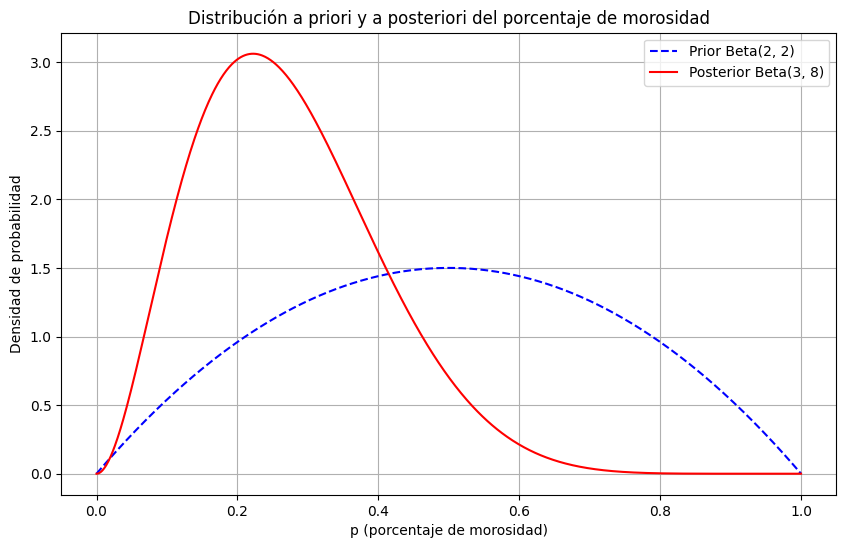

Media de la posterior: 0.2727
Varianza de la posterior: 0.0165


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Datos del problema
n = 7         # Total de clientes
x = 1         # Clientes en mora
alpha_prior = 2
beta_prior = 2

# Parámetros posterior
alpha_post = alpha_prior + x
beta_post = beta_prior + (n - x)

# Espacio para graficar
p = np.linspace(0, 1, 1000)

# Funciones de densidad
prior_pdf = beta.pdf(p, alpha_prior, beta_prior)
posterior_pdf = beta.pdf(p, alpha_post, beta_post)

# Calcular media y varianza de la posterior
mean_post = alpha_post / (alpha_post + beta_post)
var_post = (alpha_post * beta_post) / ((alpha_post + beta_post)**2 * (alpha_post + beta_post + 1))

# Gráfica
plt.figure(figsize=(10,6))
plt.plot(p, prior_pdf, 'b--', label=f'Prior Beta({alpha_prior}, {beta_prior})')
plt.plot(p, posterior_pdf, 'r-', label=f'Posterior Beta({alpha_post}, {beta_post})')
plt.title('Distribución a priori y a posteriori del porcentaje de morosidad')
plt.xlabel('p (porcentaje de morosidad)')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar media y varianza
print(f"Media de la posterior: {mean_post:.4f}")
print(f"Varianza de la posterior: {var_post:.4f}")